In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [2]:
df = pd.read_excel("/Users/mohanad/Desktop/EGAL Historical Data.xlsx")

print(df)


           Date  Price   Open   High    Low     Vol.  Change %
0    2014-06-04  15.59  15.31  16.93  15.31    0.34K    0.0000
1    2014-06-05  17.07  16.99  17.10  16.99    3.53K    0.0949
2    2014-06-09  17.07  17.06  17.06  17.05    0.33K    0.0000
3    2014-06-10  17.07  17.10  17.10  17.10    0.10K    0.0000
4    2014-06-11  17.93  17.49  18.40  17.49   10.97K    0.0504
...         ...    ...    ...    ...    ...      ...       ...
2279 2024-05-29  91.95  93.25  94.10  91.95  204.31K   -0.0132
2280 2024-05-30  92.81  92.00  96.00  92.00  388.03K    0.0094
2281 2024-06-02  92.99  92.81  94.98  92.26  154.29K    0.0019
2282 2024-06-03  91.30  92.99  93.60  90.99  134.75K   -0.0182
2283 2024-06-04  91.36  91.30  92.90  91.24  136.18K    0.0007

[2284 rows x 7 columns]


In [3]:
df = df.rename(columns = {'Price': 'Price', ' Open': 'Open', ' High': 'High', ' Low': 'Low'})

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by = 'Date')

In [5]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2014-06-04,15.59,15.31,16.93,15.31,0.34K,0.0000
1,2014-06-05,17.07,16.99,17.10,16.99,3.53K,0.0949
2,2014-06-09,17.07,17.06,17.06,17.05,0.33K,0.0000
3,2014-06-10,17.07,17.10,17.10,17.10,0.10K,0.0000
4,2014-06-11,17.93,17.49,18.40,17.49,10.97K,0.0504
...,...,...,...,...,...,...,...
2279,2024-05-29,91.95,93.25,94.10,91.95,204.31K,-0.0132
2280,2024-05-30,92.81,92.00,96.00,92.00,388.03K,0.0094
2281,2024-06-02,92.99,92.81,94.98,92.26,154.29K,0.0019
2282,2024-06-03,91.30,92.99,93.60,90.99,134.75K,-0.0182


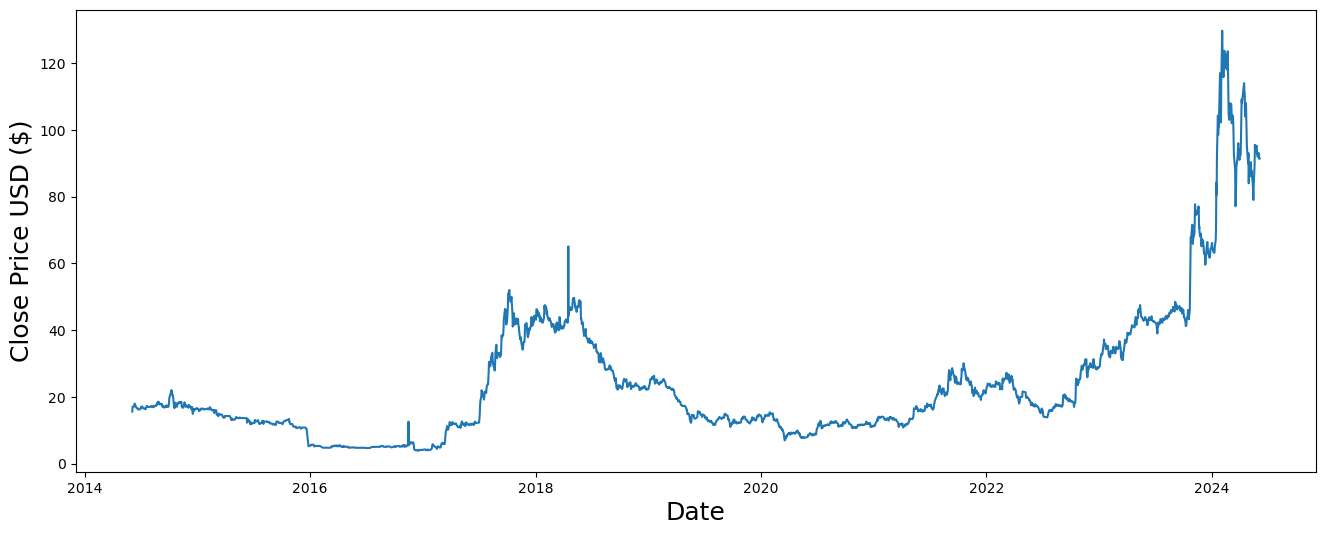

In [6]:
plt.figure(figsize=(16,6))
plt.plot(df['Date'], df['Price'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [7]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Price'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .90 ))

# Create a new dataframe with only the 'Date column and Price
predictions_df = pd.DataFrame({
    "Date": df['Date'][training_data_len:],
    "Actual": dataset[training_data_len:, 0]
})

training_data_len

2056

In [9]:
predictions_df

,Date,Actual
2056,2023-06-26,42.77
2057,2023-07-04,42.10
2058,2023-07-05,42.07
2059,2023-07-06,41.70
2060,2023-07-09,39.00
...,...,...
2279,2024-05-29,91.95
2280,2024-05-30,92.81
2281,2024-06-02,92.99
2282,2024-06-03,91.30


In [10]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.09314154],
       [0.10490344],
       [0.10490344],
       ...,
       [0.70825717],
       [0.69482635],
       [0.69530319]])

In [32]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.09314154, 0.10490344, 0.10490344, 0.10490344, 0.11173806,
       0.11221489, 0.10490344, 0.10251927, 0.10108877, 0.10108877,
       0.0981483 , 0.09838671, 0.09838671, 0.09838671, 0.09838671,
       0.09981721, 0.10228086, 0.1047445 , 0.10490344, 0.1010093 ,
       0.1010093 , 0.10092983, 0.09886355, 0.09886355, 0.10514186,
       0.10657236, 0.10657236, 0.10426766, 0.10426766, 0.10426766,
       0.10577764, 0.106175  , 0.10450608, 0.10545975, 0.10545975,
       0.10339347, 0.10569816, 0.10728761, 0.10768497, 0.10712867,
       0.10752603, 0.10704919, 0.11356592, 0.11531431, 0.11094334,
       0.11674481, 0.11642693, 0.11372487, 0.11014861, 0.11054597,
       0.11078439, 0.111897  , 0.10919495, 0.10983072, 0.10434714,
       0.10434714, 0.10585711, 0.1024398 , 0.10498291, 0.10498291])]
[0.10577763649368196]

[array([0.09314154, 0.10490344, 0.10490344, 0.10490344, 0.11173806,
       0.11221489, 0.10490344, 0.10251927, 0.10108877, 0.10108877,
       0.0981483 , 0.09838671, 0.09

In [33]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=40)

Epoch 1/40
63/63 [==============================] - 5s 46ms/step - loss: 0.0016
Epoch 2/40
63/63 [==============================] - 3s 46ms/step - loss: 2.0208e-04
Epoch 3/40
63/63 [==============================] - 3s 45ms/step - loss: 1.8761e-04
Epoch 4/40
63/63 [==============================] - 3s 46ms/step - loss: 1.6620e-04
Epoch 5/40
63/63 [==============================] - 3s 46ms/step - loss: 1.6887e-04
Epoch 6/40
63/63 [==============================] - 3s 47ms/step - loss: 1.4534e-04
Epoch 7/40
63/63 [==============================] - 3s 46ms/step - loss: 1.4119e-04
Epoch 8/40
63/63 [==============================] - 3s 46ms/step - loss: 1.4324e-04
Epoch 9/40
63/63 [==============================] - 3s 46ms/step - loss: 1.3477e-04
Epoch 10/40
63/63 [==============================] - 3s 46ms/step - loss: 1.2433e-04
Epoch 11/40
63/63 [==============================] - 3s 46ms/step - loss: 1.1785e-04
Epoch 12/40
63/63 [==============================] - 3s 46ms/step - loss: 1.18

In [34]:
# Create the testing data set
# Create a new array containing scaled values  
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

8/8 [==============================] - 1s 16ms/step


4.363215831067871

In [35]:
predictions_df["Predicted"] = predictions

In [36]:
predictions_df.head(80)

,Date,Actual,Predicted
2056,2023-06-26,42.77,42.319313
2057,2023-07-04,42.10,42.351288
2058,2023-07-05,42.07,41.957447
2059,2023-07-06,41.70,41.781815
2060,2023-07-09,39.00,41.500462
...,...,...,...
2131,2023-10-22,46.03,43.312378
2132,2023-10-23,53.99,44.652935
2133,2023-10-24,63.25,50.814606
2134,2023-10-25,67.80,59.587406


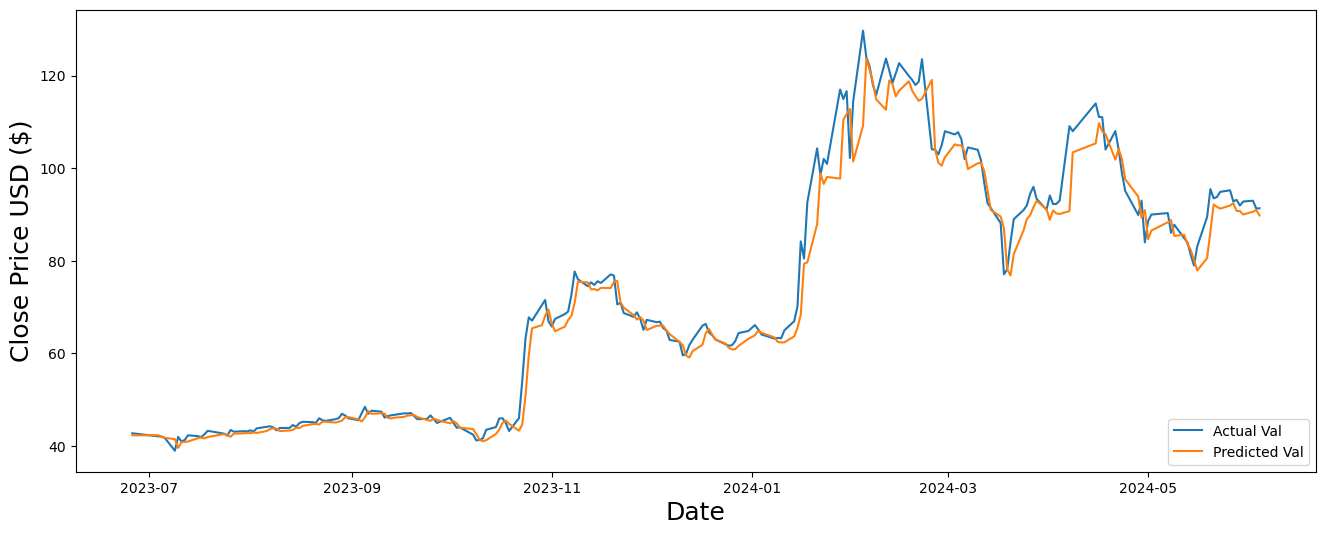

In [37]:
plt.figure(figsize=(16,6))
plt.plot(predictions_df['Date'], predictions_df[['Actual', 'Predicted']],)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend([ 'Actual Val', 'Predicted Val'], loc='lower right')
plt.show()

In [39]:
# Define threshold 
threshold = 4 # change between predicted prices

# Iterate through predictions dataframe and identify triggers
predicted_change = predictions_df["Predicted"].diff()  # Calculate difference between consecutive predicted prices
predicted_change = predicted_change.dropna()  # Remove the first element 

for index, price_change in predicted_change.items():
    if abs(price_change) > threshold:
        direction = "Increase" if price_change > 0 else "Decrease"
        print(f"Early Warning: Predicted Price significant {direction} on {predictions_df.loc[index, 'Date']}")

Early Warning: Predicted Price significant Increase on 2023-10-24 00:00:00
Early Warning: Predicted Price significant Increase on 2023-10-25 00:00:00
Early Warning: Predicted Price significant Increase on 2023-10-26 00:00:00
Early Warning: Predicted Price significant Increase on 2023-11-09 00:00:00
Early Warning: Predicted Price significant Decrease on 2023-11-22 00:00:00
Early Warning: Predicted Price significant Increase on 2024-01-17 00:00:00
Early Warning: Predicted Price significant Increase on 2024-01-21 00:00:00
Early Warning: Predicted Price significant Increase on 2024-01-22 00:00:00
Early Warning: Predicted Price significant Increase on 2024-01-29 00:00:00
Early Warning: Predicted Price significant Decrease on 2024-02-01 00:00:00
Early Warning: Predicted Price significant Increase on 2024-02-04 00:00:00
Early Warning: Predicted Price significant Increase on 2024-02-05 00:00:00
Early Warning: Predicted Price significant Increase on 2024-02-12 00:00:00
Early Warning: Predicted 